In [1]:
from __future__ import division
import os
import pickle
import tensorflow as tf
from helper import create_model
from helper import getData
from helper import imageToVertor
from helper import codeToVertor
from define import codeLength
from define import charset

In [9]:
from reader import read_code

INFO:tensorflow:Restoring parameters from model/0/model
INFO:tensorflow:Restoring parameters from model/1/model
INFO:tensorflow:Restoring parameters from model/2/model
INFO:tensorflow:Restoring parameters from model/3/model


['8', '6', '5', '2']


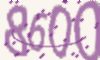

In [54]:
imageList, codeList = getData(1)
image = imageList[0]
print read_code(image)
image

['8', '0', '5', '2']

['4', '3', '5', '2']

In [2]:
modelList = []
for index in range(codeLength):
    model_path = 'model/%s/' % index
    model_file_name = os.path.join(model_path, 'model')
    nodes_file_name = os.path.join(model_path, 'nodes.pk')
    
    model = {}
    session = tf.Session() 
    saver = tf.train.import_meta_graph(model_file_name + '.meta')
    saver.restore(session, model_file_name)
    nodes = pickle.load(open(nodes_file_name, 'rU'))
    x = session.graph.get_tensor_by_name(nodes['x'])
    keep_prob = session.graph.get_tensor_by_name(nodes['keep_prob'])
    prediction = session.graph.get_tensor_by_name(nodes['prediction'])
    
    model['session'] = session
    model['x'] = x
    model['keep_prob'] = keep_prob
    model['prediction'] = prediction
    modelList.append(model)

INFO:tensorflow:Restoring parameters from model/0/model
INFO:tensorflow:Restoring parameters from model/1/model
INFO:tensorflow:Restoring parameters from model/2/model
INFO:tensorflow:Restoring parameters from model/3/model


### .预测第1个字符

In [4]:
index = 0
model_path = 'model/%s/' % index
model_file_name = os.path.join(model_path, 'model')
nodes_file_name = os.path.join(model_path, 'nodes.pk')

session0 = tf.Session() 
saver0 = tf.train.import_meta_graph(model_file_name + '.meta')
saver0.restore(session0, model_file_name)
nodes0 = pickle.load(open(nodes_file_name, 'rU'))
x0 = session0.graph.get_tensor_by_name(nodes0['x'])
y0 = session0.graph.get_tensor_by_name(nodes0['y'])
keep_prob0 = session0.graph.get_tensor_by_name(nodes0['keep_prob'])
prediction0 = session0.graph.get_tensor_by_name(nodes0['prediction'])

INFO:tensorflow:Restoring parameters from model/0/model


real: 3
prediction: 2


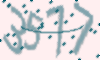

In [5]:
index = 0
imageList, codeList = getData(1)
codeList = map(lambda x: x[index], codeList)
x_data = map(imageToVertor, imageList)
y_data = map(codeToVertor, codeList)
p = session0.run(prediction0, feed_dict={x0: x_data, keep_prob0: 1})
print 'real:', codeList[0]
print 'prediction:', charset[p[0][0]]
imageList[0]

### .预测第2个字符

In [ ]:
index = 1
model_path = 'model/%s/' % index
model_file_name = os.path.join(model_path, 'model')
nodes_file_name = os.path.join(model_path, 'nodes.pk')

session1 = tf.Session() 
saver1 = tf.train.import_meta_graph(model_file_name + '.meta')
saver1.restore(session1, model_file_name)
nodes1 = pickle.load(open(nodes_file_name, 'rU'))
x1 = session1.graph.get_tensor_by_name(nodes1['x'])
y1 = session1.graph.get_tensor_by_name(nodes1['y'])
keep_prob1 = session1.graph.get_tensor_by_name(nodes1['keep_prob'])
prediction1 = session1.graph.get_tensor_by_name(nodes1['prediction'])

In [ ]:
index = 1
imageList, codeList = getData(1)
codeList = map(lambda x: x[index], codeList)
x_data = map(imageToVertor, imageList)
y_data = map(codeToVertor, codeList)
p = session1.run(prediction1, feed_dict={x1: x_data, keep_prob1: .1})
print 'real:', codeList[0]
print 'prediction:', charset[p[0][0]]
imageList[0]